In [1]:
import urllib
from urllib import request
import requests
import numpy as np
import pandas as pd
import geopandas as gpd
import scipy
import os
import sys
import json
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import bokeh
from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.plotting import figure
import zipfile

In [2]:
url = 'https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD'
tonn = pd.read_csv(url)

In [3]:
tonn.head(2)

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,SCHOOLORGANICTONS,LEAVESORGANICTONS,XMASTREETONS,BOROUGH_ID
0,2017 / 09,Bronx,6,2118.4,115.2,169.1,NaN,58.7,NaN,NaN,2
1,2017 / 09,Bronx,9,3820.2,199.4,321.2,NaN,NaN,NaN,NaN,2


In [4]:
tonn.columns

Index(['MONTH', 'BOROUGH', 'COMMUNITYDISTRICT', 'REFUSETONSCOLLECTED',
       'PAPERTONSCOLLECTED', 'MGPTONSCOLLECTED', 'RESORGANICSTONS',
       'SCHOOLORGANICTONS', 'LEAVESORGANICTONS', 'XMASTREETONS', 'BOROUGH_ID'],
      dtype='object')

In [5]:
tonn.MONTH.unique()

array(['2017 / 09', '2017 / 10', '2017 / 11', '2017 / 12', '2018 / 01',
       '2018 / 02', '2018 / 03', '2018 / 04', '2018 / 05', '2018 / 06',
       '2018 / 07', '2018 / 08', '2018 / 09', '2018 / 10'], dtype=object)

In [6]:
tonn=tonn.drop([
       'SCHOOLORGANICTONS', 'LEAVESORGANICTONS'], axis=1)

In [7]:
tonn = tonn.drop(tonn[tonn.MONTH=='2018 / 10'].index)

In [8]:
tonn.MONTH.unique()

array(['2017 / 09', '2017 / 10', '2017 / 11', '2017 / 12', '2018 / 01',
       '2018 / 02', '2018 / 03', '2018 / 04', '2018 / 05', '2018 / 06',
       '2018 / 07', '2018 / 08', '2018 / 09'], dtype=object)

In [9]:
# Splitting data for 5 boroughs

tonn_mn=tonn[tonn.BOROUGH=='Manhattan']
tonn_bk=tonn[tonn.BOROUGH=='Brooklyn']
tonn_qns=tonn[tonn.BOROUGH=='Queens']
tonn_si=tonn[tonn.BOROUGH=='Staten Island']
tonn_bx=tonn[tonn.BOROUGH=='Bronx']

In [10]:
tonn_mn.head()

,MONTH,BOROUGH,COMMUNITYDISTRICT,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,XMASTREETONS,BOROUGH_ID
10,2017 / 10,Manhattan,4,2423.1,431.9,356.8,NaN,NaN,1
12,2017 / 10,Manhattan,11,2245.2,197.3,175.2,NaN,NaN,1
15,2017 / 10,Manhattan,6,2944.2,511.1,377.8,19.2,NaN,1
17,2017 / 10,Manhattan,9,2289.7,246.2,232.0,28.9,NaN,1
19,2017 / 11,Manhattan,6,2888.7,571.6,435.5,29.8,NaN,1


In [11]:
# Manhattan Data:
paper_mn=tonn_mn.groupby('MONTH')['PAPERTONSCOLLECTED'].mean()
gm_mn=tonn_mn.groupby('MONTH')['MGPTONSCOLLECTED'].mean()
trash_mn=tonn_mn.groupby('MONTH')['REFUSETONSCOLLECTED'].mean()

In [12]:
# Brooklyn Data:
paper_bk=tonn_bk.groupby('MONTH')['PAPERTONSCOLLECTED'].mean()
gm_bk=tonn_bk.groupby('MONTH')['MGPTONSCOLLECTED'].mean()
trash_bk=tonn_bk.groupby('MONTH')['REFUSETONSCOLLECTED'].mean()

In [13]:
# Queens Data:
paper_qns=tonn_qns.groupby('MONTH')['PAPERTONSCOLLECTED'].mean()
gm_qns=tonn_qns.groupby('MONTH')['MGPTONSCOLLECTED'].mean()
trash_qns=tonn_qns.groupby('MONTH')['REFUSETONSCOLLECTED'].mean()

In [14]:
# Staten Island Data:
paper_si=tonn_si.groupby('MONTH')['PAPERTONSCOLLECTED'].mean()
gm_si=tonn_si.groupby('MONTH')['MGPTONSCOLLECTED'].mean()
trash_si=tonn_si.groupby('MONTH')['REFUSETONSCOLLECTED'].mean()

In [15]:
# Bronx Data:
paper_bx=tonn_bx.groupby('MONTH')['PAPERTONSCOLLECTED'].mean()
gm_bx=tonn_bx.groupby('MONTH')['MGPTONSCOLLECTED'].mean()
trash_bx=tonn_bx.groupby('MONTH')['REFUSETONSCOLLECTED'].mean()

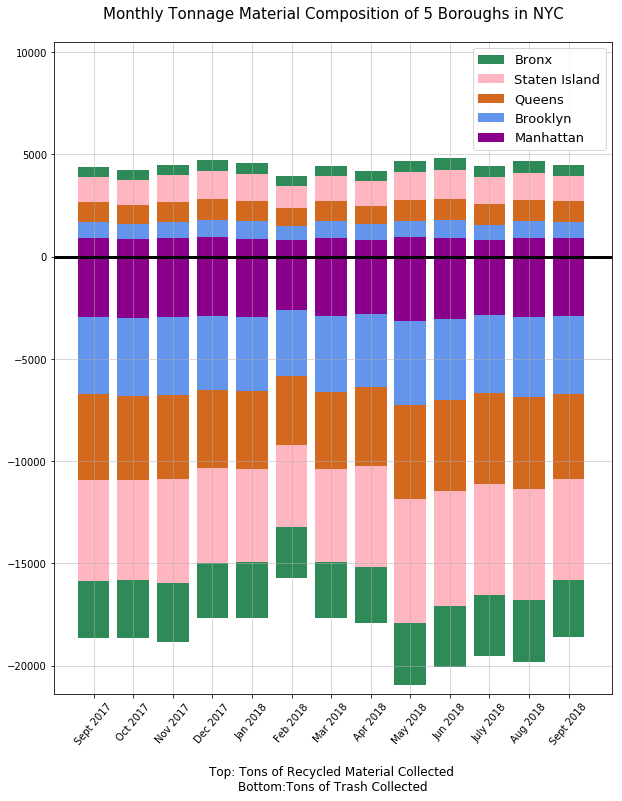

In [18]:
# Reference: https://chrisalbon.com/python/data_visualization/matplotlib_back_to_back_bar_plot/

y1 = paper_mn+gm_mn
y2 = paper_bk+gm_bk
y3 = paper_qns+gm_qns
y4 = paper_si+gm_si
y5 = paper_bx+gm_bx
y6 = trash_mn
y7 = trash_bk
y8 = trash_qns
y9 = trash_si
y10 = trash_bx

# Create the bar labels
bar_labels = ['Sept 2017', 'Oct 2017', 'Nov 2017', 'Dec 2017', 'Jan 2018', 'Feb 2018', 'Mar 2018', 'Apr 2018', 'May 2018',
             'Jun 2018', 'July 2018', 'Aug 2018', 'Sept 2018']

# Create a figure

plt.figure(figsize=(10,12))

# Set the y position
x_pos = np.arange(len(y1))
x_pos = [y for y in x_pos]
plt.xticks(x_pos, bar_labels, fontsize=10)

# Create a horizontal bar in the position y_pos



bx=plt.bar(x_pos, y5, align='center', color='#2E8B57', bottom=y1+y2+y3+y4)

si=plt.bar(x_pos, y4, align='center', color='#FFB6C1', bottom=y1+y2+y3)
qns=plt.bar(x_pos, y3, align='center', color='#D2691E', bottom=y1+y2)
bk=plt.bar(x_pos, y2, align='center', color='#6495ED', bottom=y1)
mn=plt.bar(x_pos, y1, align='center', color='#8B008B')

bx_t=plt.bar(x_pos, -y10-y9-y8-y7-y6, align='center', color='#2E8B57', alpha=1)
si_t=plt.bar(x_pos, -y9-y8-y7-y6, align='center', color='#FFB6C1', alpha=1)
qns_t=plt.bar(x_pos, -y8-y7-y6, align='center', color='#D2691E', alpha=1)
bk_t=plt.bar(x_pos, -y7-y6, align='center', color='#6495ED', alpha=1)
mn_t=plt.bar(x_pos, -y6, align='center', color='#8B008B', alpha=1)





# annotation and labels

plt.xlabel('\nTop: Tons of Recycled Material Collected \nBottom:Tons of Trash Collected', horizontalalignment='center',fontsize=12)
t = plt.title('Monthly Tonnage Material Composition of 5 Boroughs in NYC\n', fontsize=15)
plt.xlim([-1,len(y1)+0.1])
plt.xticks(rotation=50)
plt.ylim([-21400, 10500])
plt.legend(['Bronx','Staten Island', 'Queens', 'Brooklyn', 'Manhattan'], fontsize=13,loc=1)

plt.plot([-10,15],[0,0], 'k', linewidth=3)

plt.grid(alpha=0.6)

plt.show()